In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('oec (1).csv', sep=",")

In [3]:
data.head()

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,Type
0,Kepler-13 A b,46997.0,18629.00,1.76,0.03,2750.0,2011,530.0,26299.00,27030.00,7650,Hot Jupiter
1,KELT-7 b,46753.0,1.53,2.73,0.04,2048.0,2015,129.0,1.53,1.73,6789,Hot Jupiter
2,KOI-830 b,46388.0,44044.00,3.53,0.04,1070.0,2014,720.0,0.87,0.80,5150,Gas giant
3,CoRoT-20 b,45383.0,0.84,43870.00,0.09,1002.0,2011,1230.0,41640.00,43862.00,5880,Hot Jupiter
4,WASP-82 b,45292.0,24473.00,2.71,0.04,2190.0,2013,200.0,23012.00,43132.00,6490,Hot Jupiter


In [4]:
data.shape

(239, 12)

In [5]:
def check_null_values(data):
    return list(zip([i for i in data.columns], zip(
    #типы колонок
    [str(i) for i in data.dtypes],
    #проверка, есть ли пропущенные значения
    [i for i in data.isnull().sum()])))

In [7]:
data_features = check_null_values(data)
data_features

[('PlanetIdentifier', ('object', 0)),
 ('PlanetaryMassJpt', ('float64', 0)),
 ('RadiusJpt', ('float64', 0)),
 ('PeriodDays', ('float64', 0)),
 ('SemiMajorAxisAU', ('float64', 0)),
 ('SurfaceTempK', ('float64', 0)),
 ('DiscoveryYear', ('int64', 0)),
 ('DistFromSunParsec', ('float64', 0)),
 ('HostStarMassSlrMass', ('float64', 0)),
 ('HostStarRadiusSlrRad', ('float64', 0)),
 ('HostStarTempK', ('int64', 0)),
 ('Type', ('object', 0))]

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
category_columns = ['PlanetIdentifier', 'Type']
for col in category_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
data

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,Type
0,121,46997.0,18629.00,1.76,0.03,2750.0,2011,530.00,26299.00,27030.00,7650,1
1,94,46753.0,1.53,2.73,0.04,2048.0,2015,129.00,1.53,1.73,6789,1
2,111,46388.0,44044.00,3.53,0.04,1070.0,2014,720.00,0.87,0.80,5150,0
3,11,45383.0,0.84,43870.00,0.09,1002.0,2011,1230.00,41640.00,43862.00,5880,1
4,228,45292.0,24473.00,2.71,0.04,2190.0,2013,200.00,23012.00,43132.00,6490,1
...,...,...,...,...,...,...,...,...,...,...,...,...
234,104,0.0,0.11,23.09,0.13,376.0,2014,114.07,0.52,0.44,3841,2
235,157,0.0,0.08,6.10,0.03,251.3,2017,43842.00,0.08,0.12,2559,2
236,105,0.0,0.07,0.24,0.01,7112.0,2011,1180.00,0.50,0.20,27730,2
237,156,0.0,0.07,4.05,0.02,288.0,2017,43842.00,0.08,0.12,2559,2


Масштабирование

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [15]:
data_scaled = data.copy()
data_scaled.describe()

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,Type
count,239.000000,239.000000,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,119.000000,6981.594310,14381.474895,5.118941e+04,0.717490,1337.948536,2010.970711,2247.865272,11364.931004,10216.666778,5899.472803,0.702929
std,69.137544,14679.970696,65156.976469,2.989623e+05,5.556112,697.183626,2.877612,8647.664606,18628.806996,15919.227746,2167.707508,0.691813
min,0.000000,0.000000,0.060000,2.400000e-01,0.010000,198.600000,1999.000000,14.550000,0.080000,0.120000,2559.000000,0.000000
25%,59.500000,0.315000,0.950000,2.705000e+00,0.040000,977.400000,2010.000000,202.000000,0.930000,0.940000,5477.500000,0.000000
50%,119.000000,0.840000,1.270000,3.650000e+00,0.050000,1316.300000,2011.000000,338.000000,1.170000,1.380000,5870.000000,1.000000
75%,178.500000,3.695000,16255.000000,6.155000e+00,0.060000,1609.900000,2013.000000,613.200000,20272.500000,18994.000000,6182.000000,1.000000
max,238.000000,46997.000000,981774.000000,2.791458e+06,67.960000,7112.000000,2017.000000,44156.000000,47119.000000,46753.000000,27730.000000,2.000000


In [16]:
X_ALL = data_scaled.drop('Type', axis=1)
X_ALL

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK
0,121,46997.0,18629.00,1.76,0.03,2750.0,2011,530.00,26299.00,27030.00,7650
1,94,46753.0,1.53,2.73,0.04,2048.0,2015,129.00,1.53,1.73,6789
2,111,46388.0,44044.00,3.53,0.04,1070.0,2014,720.00,0.87,0.80,5150
3,11,45383.0,0.84,43870.00,0.09,1002.0,2011,1230.00,41640.00,43862.00,5880
4,228,45292.0,24473.00,2.71,0.04,2190.0,2013,200.00,23012.00,43132.00,6490
...,...,...,...,...,...,...,...,...,...,...,...
234,104,0.0,0.11,23.09,0.13,376.0,2014,114.07,0.52,0.44,3841
235,157,0.0,0.08,6.10,0.03,251.3,2017,43842.00,0.08,0.12,2559
236,105,0.0,0.07,0.24,0.01,7112.0,2011,1180.00,0.50,0.20,27730
237,156,0.0,0.07,4.05,0.02,288.0,2017,43842.00,0.08,0.12,2559


In [17]:
# Функция восстановления датафрейма на основе масштабированных данных 
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [19]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data_scaled['Type'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((191, 11), (48, 11))

In [20]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_scaled = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_scaled)
data_cs11_scaled

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK
0,0.028989,2.731571,0.065326,-0.171577,-0.123995,2.029616,0.010199,-0.199068,0.803348,1.058382,0.809242
1,-0.362357,2.714915,-0.221160,-0.171574,-0.122192,1.020594,1.403158,-0.245536,-0.611271,-0.643020,0.411215
2,-0.115954,2.689999,0.456203,-0.171571,-0.122192,-0.385137,1.054918,-0.177050,-0.611306,-0.643078,-0.346470
3,-1.565382,2.621395,-0.221171,-0.024534,-0.113174,-0.482876,0.010199,-0.117951,1.628586,2.117938,-0.009002
4,1.579876,2.615183,0.155205,-0.171574,-0.122192,1.224698,0.706679,-0.237308,0.626530,2.071986,0.272992
...,...,...,...,...,...,...,...,...,...,...,...
234,-0.217414,-0.476584,-0.221182,-0.171506,-0.105959,-1.382659,1.054918,-0.247266,-0.611325,-0.643101,-0.951601
235,0.550782,-0.476584,-0.221182,-0.171563,-0.123995,-1.561897,2.099637,4.819963,-0.611349,-0.643121,-1.544250
236,-0.202920,-0.476584,-0.221183,-0.171582,-0.127603,8.299347,0.010199,-0.123745,-0.611326,-0.643116,10.091925
237,0.536288,-0.476584,-0.221183,-0.171569,-0.125799,-1.509146,2.099637,4.819963,-0.611349,-0.643121,-1.544250


Обработка выбросов

In [23]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

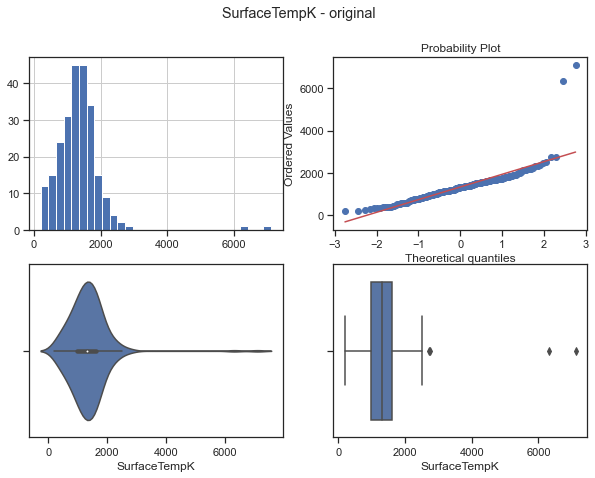

In [25]:
diagnostic_plots(data, 'SurfaceTempK', 'SurfaceTempK - original')

Обнаружение выбросов 

In [26]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    #SIGMA = 1
    QUANTILE = 2
    #IRQ = 3

In [27]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    #if outlier_boundary_type == OutlierBoundaryType.SIGMA:
    #   K1 = 3
    #    lower_boundary = df[col].mean() - (K1 * df[col].std())
    #    upper_boundary = df[col].mean() + (K1 * df[col].std())

    #elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)

    #elif outlier_boundary_type == OutlierBoundaryType.IRQ:
    #    K2 = 1.5
    #    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    #    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    #    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    #else:
     #   raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

In [28]:
x_col_list = ['HostStarTempK', 'DistFromSunParsec', 'SemiMajorAxisAU', 'SurfaceTempK']

In [31]:
data1=data

Замена выбросов 

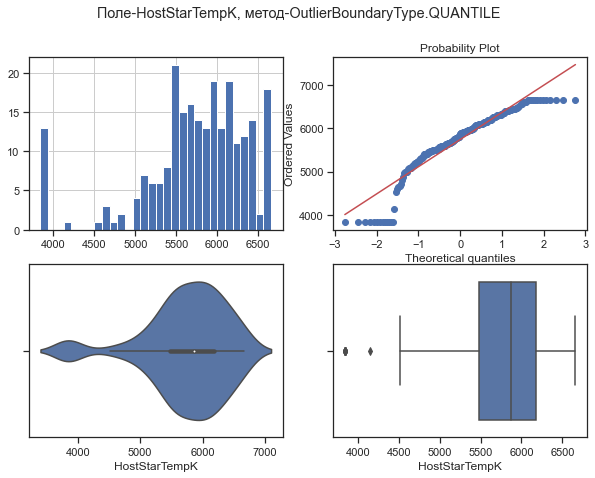

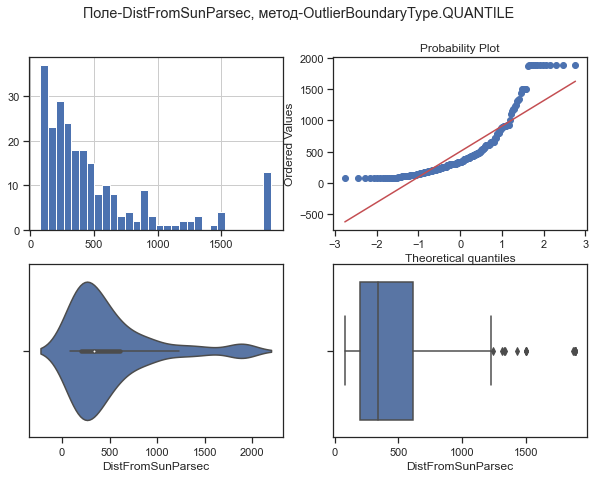

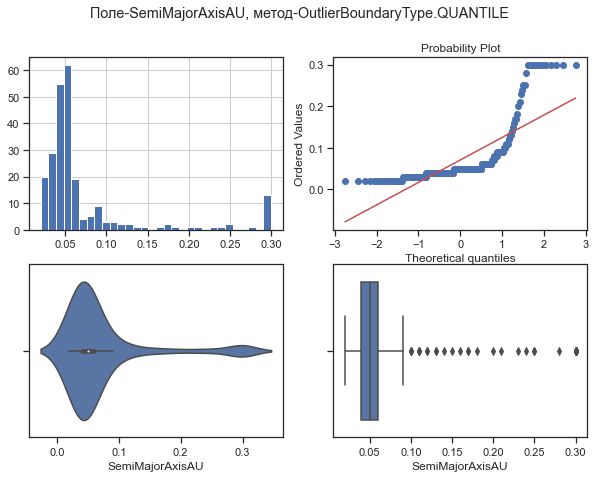

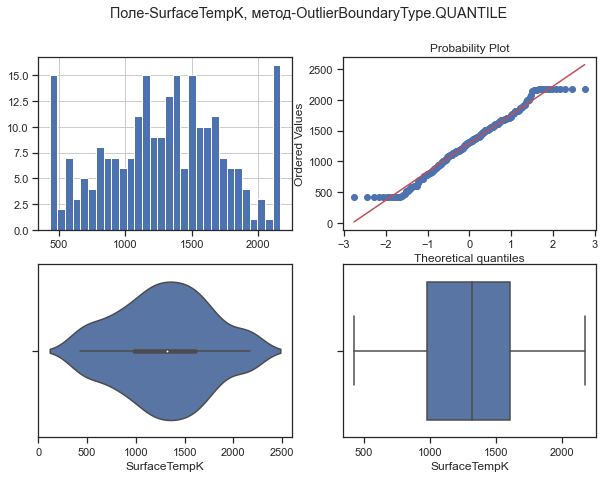

In [32]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data1[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data1, col, title)

Обучение моделей

In [36]:
# Разделим выборку на обучающую и тестовую
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(data_cs11_scaled, data['Type'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_basic_df = arr_to_df(X_train_basic)
X_test_basic_df = arr_to_df(X_test_basic)

X_train_basic_df.shape, X_test_basic_df.shape

((191, 11), (48, 11))

In [41]:
X_train_basic1, X_test_basic1, y_train_basic1, y_test_basic1 = train_test_split(data, data['Type'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_basic_df1 = arr_to_df(X_train_basic1)
X_test_basic_df1 = arr_to_df(X_test_basic1)

X_train_basic_df1.shape, X_test_basic_df1.shape

((191, 11), (48, 11))

In [37]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [39]:
clas_models_dict = {'LinR': LinearRegression(), 
                    'SVR': SVR(),
                    'KNN_5':KNeighborsRegressor(n_neighbors=5),
                    'Tree':DecisionTreeRegressor(random_state=1),
                    'GB': GradientBoostingRegressor(random_state=1),
                    'RF':RandomForestRegressor(n_estimators=50, random_state=1)}

In [43]:
X_data_dict = {'Basic': (X_train_basic_df1, X_test_basic_df1),
               'Advanced': (X_train_basic_df, X_test_basic_df)}

In [44]:
def test_models(clas_models_dict, X_data_dict, y_train, y_test):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name, data_tuple in X_data_dict.items():

            X_train, X_test = data_tuple
              
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            logger.add(model_name, data_name, mse)
            
    return logger

In [45]:
%%time
logger = test_models(clas_models_dict, X_data_dict, y_train_basic, y_test_basic)

Wall time: 470 ms


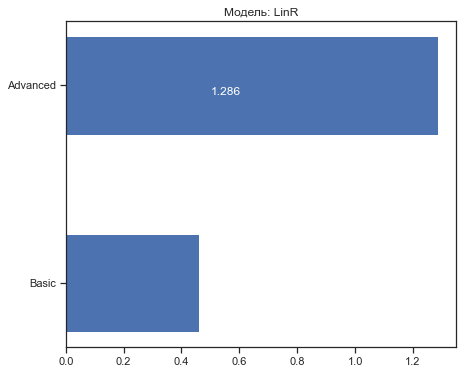

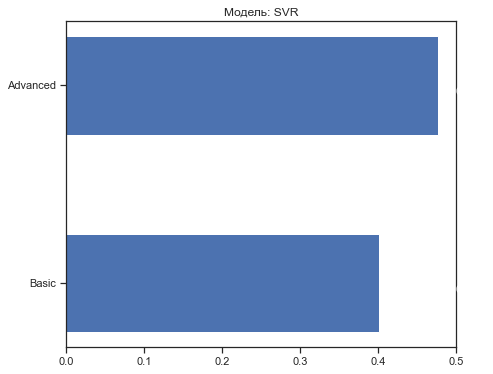

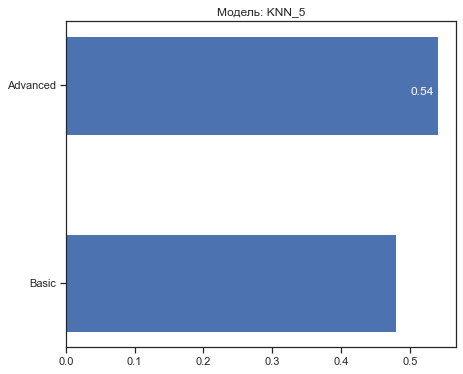

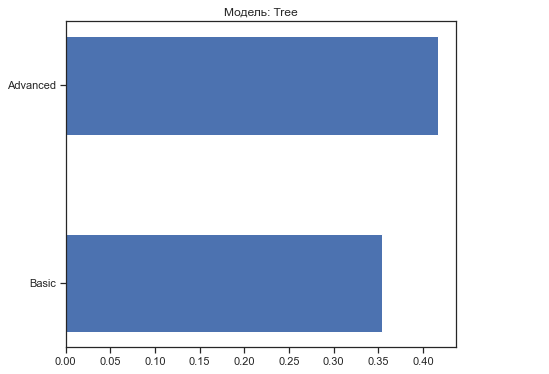

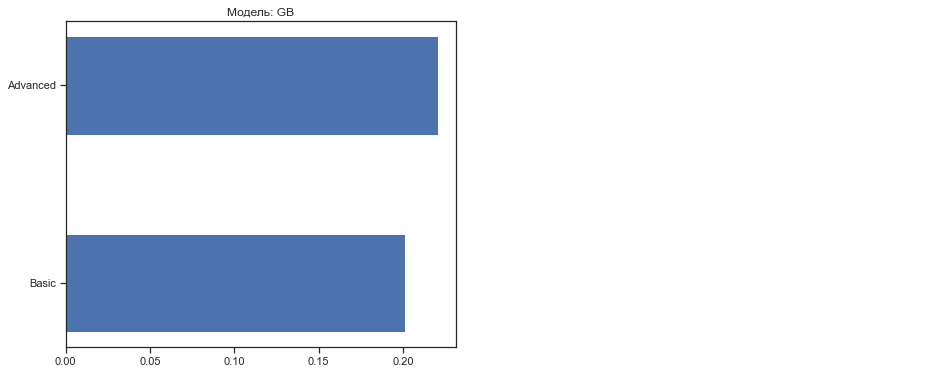

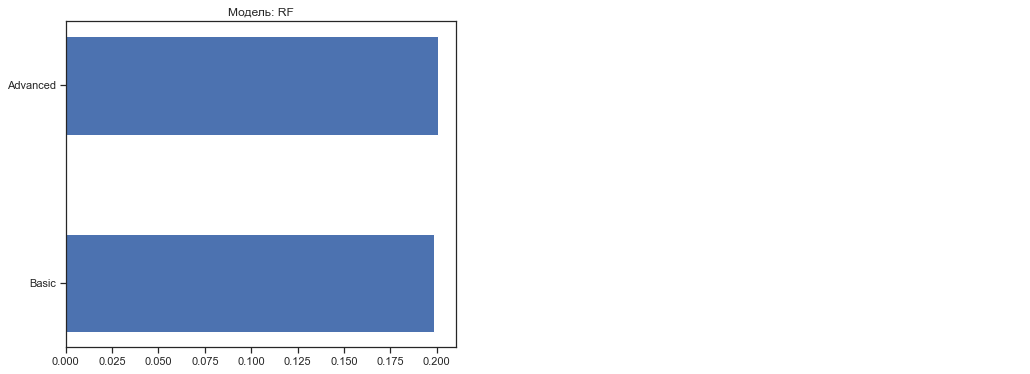

In [46]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 6))

 Модель с использованием AutoML

In [47]:

import sklearn
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML


In [48]:
train = data

In [49]:
automl = AutoML()

In [50]:
automl.fit(train[train.columns[:-1]], train["Type"])

AutoML directory: AutoML_4
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.993422 trained in 0.32 seconds
2_DecisionTree logloss 0.732331 trained in 12.13 seconds
3_Linear logloss 0.791209 trained in 4.88 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.510588 trained in 5.09 seconds
5_Default_NeuralNetwork logloss 0.787236 trained in 0.47 seconds
6_Default_RandomForest logloss 0.507413 trained in 7.27 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.481303 trained in 0.15 seconds
AutoML fit time: 33.92 seconds


AutoML()

In [51]:
automl2 = AutoML()

In [52]:
automl2.fit(data_cs11_scaled, data["Type"])

AutoML directory: AutoML_5
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.993422 trained in 0.21 seconds
2_DecisionTree logloss 0.739275 trained in 7.1 seconds
3_Linear logloss 0.766762 trained in 5.01 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.506169 trained in 5.25 seconds
5_Default_NeuralNetwork logloss 0.911945 trained in 0.44 seconds
6_Default_RandomForest logloss 0.515012 trained in 7.39 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.488841 trained in 0.14 seconds
AutoML fit time: 29.15 seconds


AutoML()